# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [3]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from statsmodels.graphics.correlation import plot_corr

# Libraries for data preparation and model building
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

import math
from statsmodels.graphics.correlation import plot_corr
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# Setting global constants to ensure notebook results aDre reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [4]:
df = pd.read_csv('df_train.csv')
df.head()
#parse_dates=True, index_col='time'

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [14]:
df.shape

(8763, 49)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

we find that feacture time,Seville_pressure, Valencia_wind_deg  are in object datatype 

In [5]:
df.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

we find that Valencia_pressure has 2068 null values so we gonna replace it with mean 

In [7]:
#determining the statistics or 5 number summary of the whole dataset
df.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [14]:
#look at duplicates
df.duplicated().sum()

0

In [10]:
df['Seville_pressure']

0       sp25
1       sp25
2       sp25
3       sp25
4       sp25
        ... 
8758    sp23
8759    sp23
8760    sp22
8761    sp23
8762    sp25
Name: Seville_pressure, Length: 8763, dtype: object

In [9]:
#change date to datetime datatype
df['time']=pd.to_datetime(df['time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            8763 non-null   int64         
 1   time                  8763 non-null   datetime64[ns]
 2   Madrid_wind_speed     8763 non-null   float64       
 3   Valencia_wind_deg     8763 non-null   object        
 4   Bilbao_rain_1h        8763 non-null   float64       
 5   Valencia_wind_speed   8763 non-null   float64       
 6   Seville_humidity      8763 non-null   float64       
 7   Madrid_humidity       8763 non-null   float64       
 8   Bilbao_clouds_all     8763 non-null   float64       
 9   Bilbao_wind_speed     8763 non-null   float64       
 10  Seville_clouds_all    8763 non-null   float64       
 11  Bilbao_wind_deg       8763 non-null   float64       
 12  Barcelona_wind_speed  8763 non-null   float64       
 13  Barcelona_wind_deg

change all columns that are in  object to their appropriate datatypes

In [5]:
#Checking for outliers in all columns
df.kurtosis()

C:\Users\ZANELE~1\AppData\Local\Temp/ipykernel_12524/3087966482.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis()


Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

.normal distribution has a kurtosis of 3.
.above we find so many features with kurtosis >3 meaning it is heavy-tailed / many outlies.


C:\Users\ZANELE HAPPY BHENGU\Downloads\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Valencia_snow_3h'>

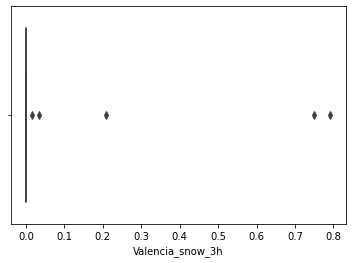

In [8]:
#visualising features with outlies
sns.boxplot(df['Valencia_snow_3h'])

C:\Users\ZANELE HAPPY BHENGU\Downloads\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Barcelona_pressure'>

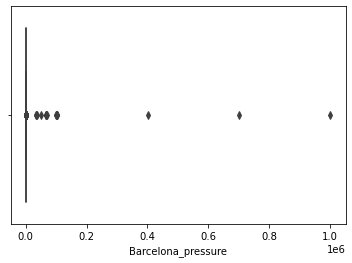

In [13]:
sns.boxplot(df['Barcelona_pressure'])

<AxesSubplot:xlabel='Valencia_wind_speed'>

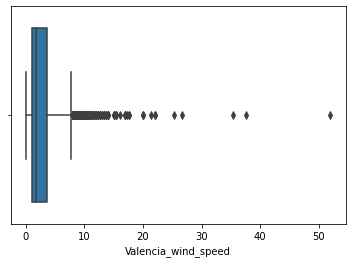

In [11]:
sns.boxplot(x='Valencia_wind_speed', data=df)

remember the maximum wind speed that we know of is 20 after 20 all are outlies or the was an error during the process

In [12]:
#locking the skewness of the training data
df.skew()

C:\Users\ZANELE~1\AppData\Local\Temp/ipykernel_12524/1564662885.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

Bilbao_snow_3h, Barcelona_pressure, Seville_rain_3h, Barcelona_rain_3h and Valencia_snow_3h have high positive symmetrical data.
Madrid_weather_id, Barcelona_weather_id and Seville_weather_id have high negative symmetry.
features with high positive and negative are considered as outlies

<AxesSubplot:>

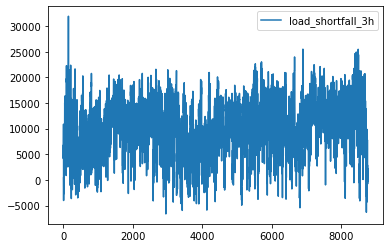

In [15]:
# plot relevant feature interactions

df['load_shortfall_3h'].plot(label='load_shortfall_3h',legend=True)

this data is to noisey so it not easy to understand it so that is wh we used the kirtosis

In [17]:
#correlation
df.corr()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Unnamed: 0,1.000000,-0.109288,-0.249633,-0.090161,-0.079025,-0.103359,-0.068123,0.049197,-0.140583,-0.155738,...,0.093378,0.068078,0.028698,0.081799,0.103436,0.146216,0.037487,0.088439,0.085197,0.192612
Madrid_wind_speed,-0.109288,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,...,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,-0.249633,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,...,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,-0.090161,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,...,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.079025,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,...,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.103359,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,...,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,-0.068123,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,...,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.049197,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,...,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,-0.140583,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,...,-0.238895,-0.186463,-0.134249,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804
Bilbao_wind_deg,-0.155738,0.270950,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,...,0.028535,0.068701,0.095047,0.065396,0.086482,0.031187,0.062663,0.044102,0.048397,-0.120800


In [21]:
#subtituting missing values
df['Valencia_pressure'].fillna(df['Valencia_pressure'].mean(), inplace = True)
df['Valencia_pressure']

0       1002.666667
1       1004.333333
2       1005.333333
3       1009.000000
4       1012.051407
           ...     
8758    1012.051407
8759    1021.000000
8760    1009.666667
8761    1020.000000
8762    1012.051407
Name: Valencia_pressure, Length: 8763, dtype: float64

<AxesSubplot:>

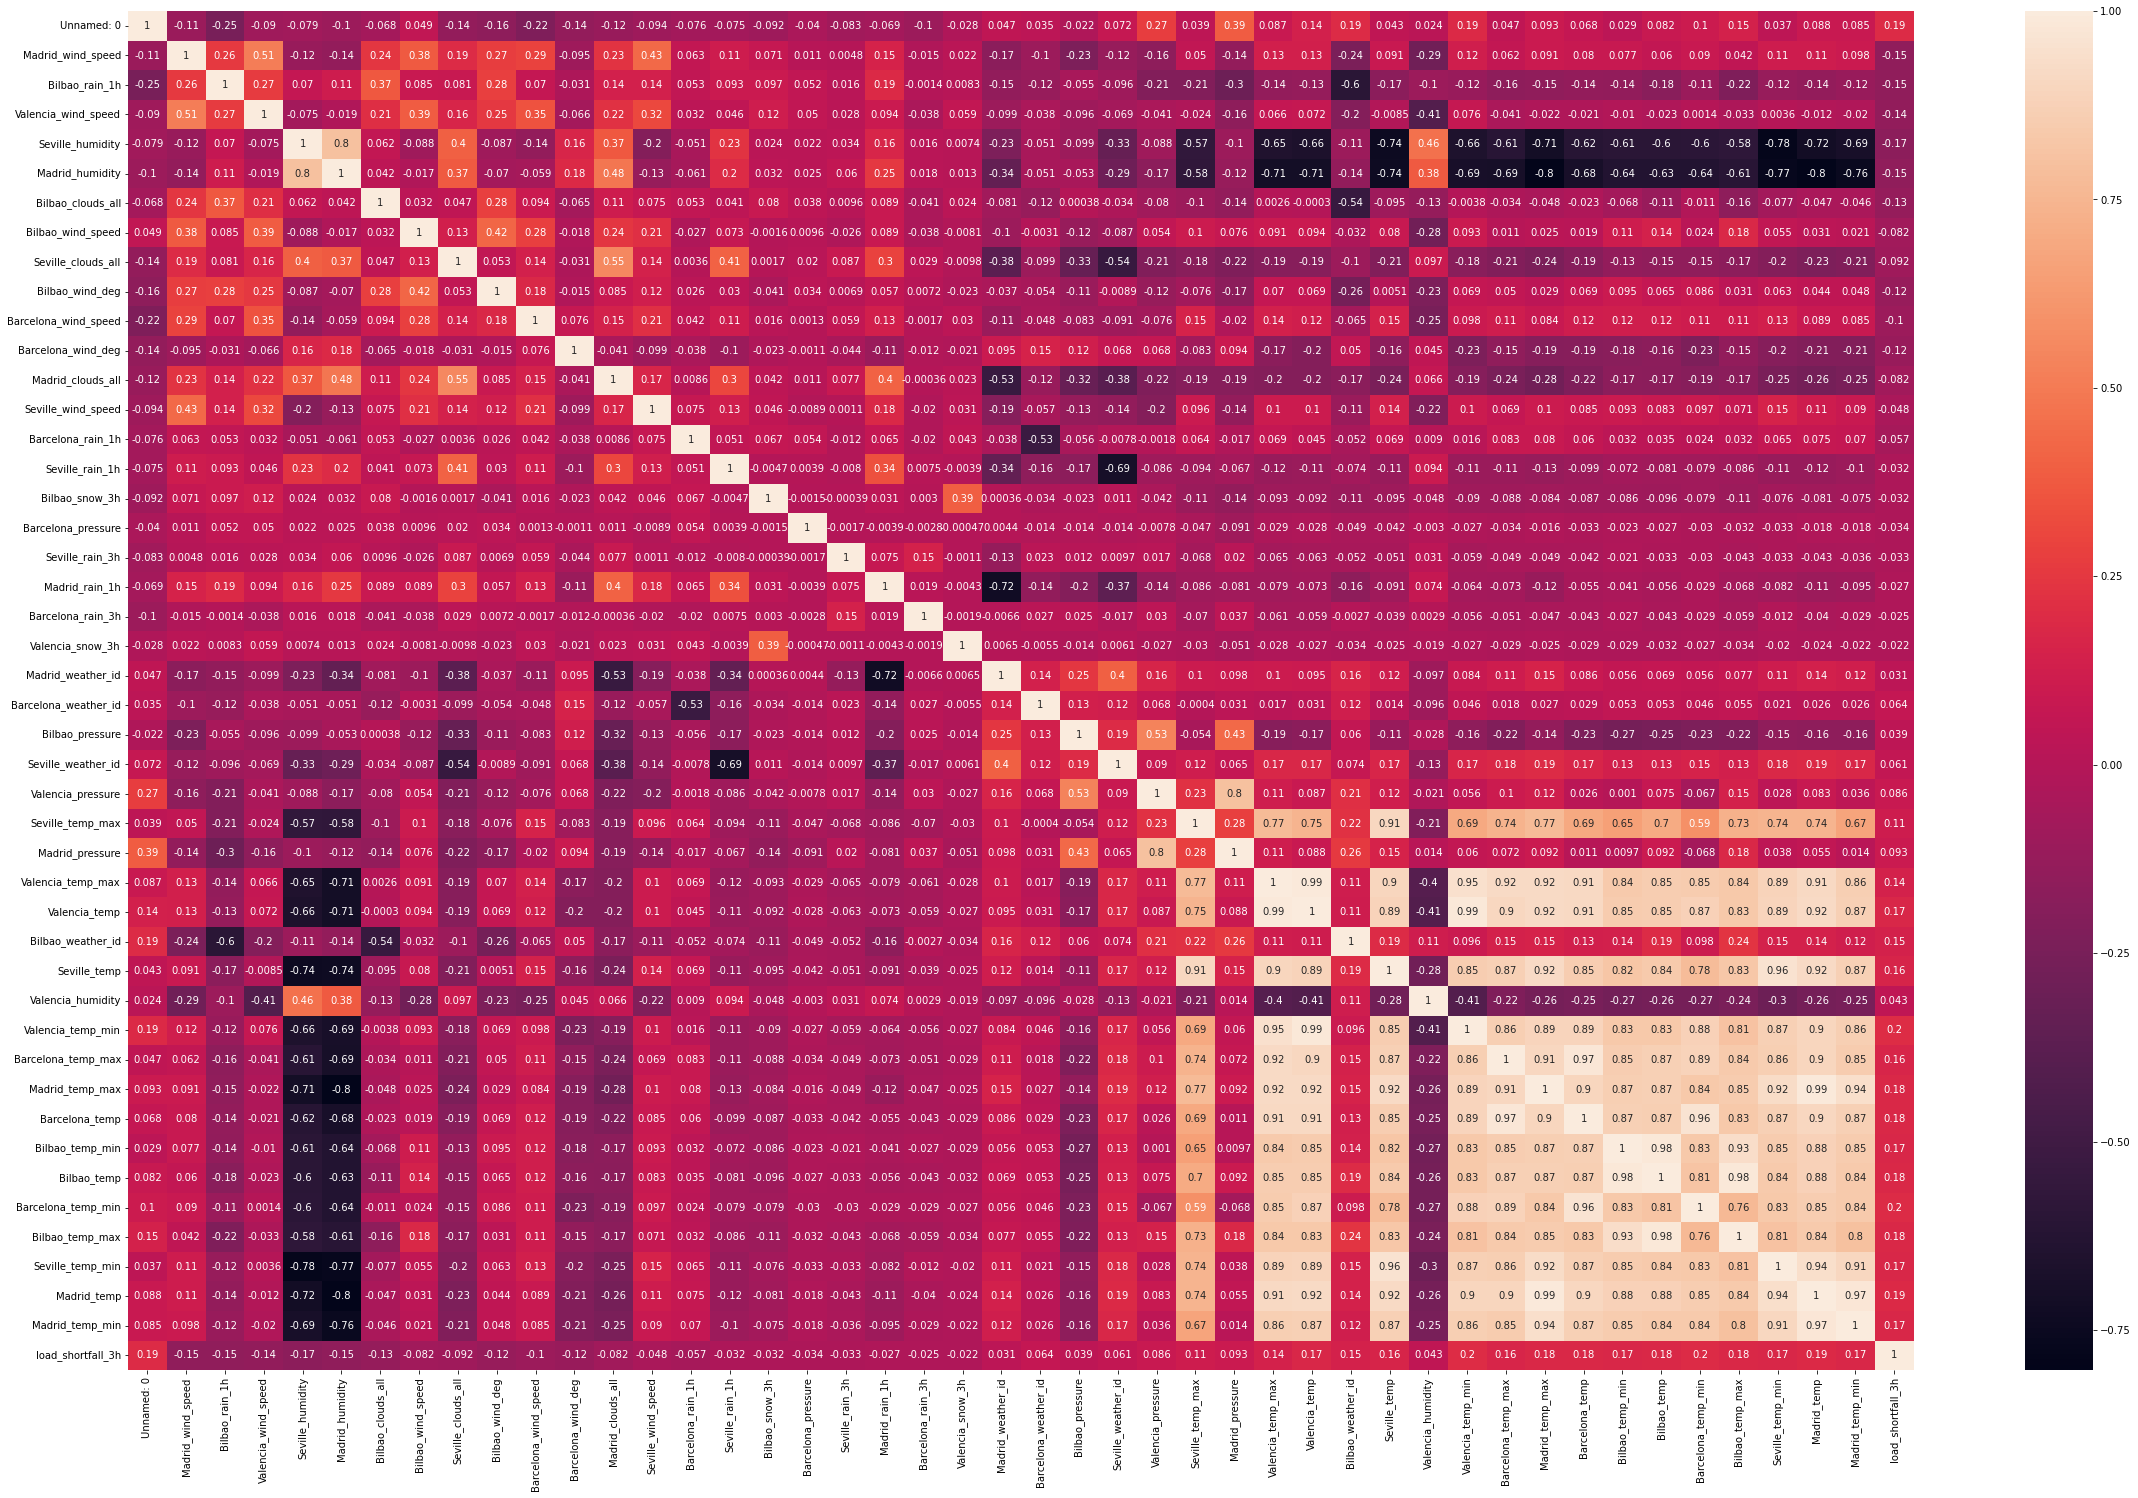

In [24]:
# evaluate correlation

# Plot the matrix
plt.figure(figsize=(40,25))
sns.heatmap(df.corr(),annot=True)

In [ ]:
# have a look at feature distributions


<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [23]:
#droping the outlies



In [ ]:
# create new features

In [ ]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [24]:
#spliting data
X= df.drop(['load_shortfall_3h','time','Seville_pressure','Valencia_wind_deg','Unnamed: 0'],axis=1)
y= df['load_shortfall_3h']


In [27]:
X_features= X[['Madrid_wind_speed', 'Bilbao_rain_1h','Valencia_wind_speed', 
        'Seville_humidity', 'Madrid_humidity','Bilbao_clouds_all',
        'Bilbao_wind_speed', 'Seville_clouds_all','Bilbao_wind_deg',
        'Barcelona_wind_speed', 'Barcelona_wind_deg','Madrid_clouds_all',
        'Seville_wind_speed', 'Barcelona_rain_1h','Seville_rain_1h', 
        'Bilbao_snow_3h','Barcelona_pressure', 'Seville_rain_3h', 
        'Madrid_rain_1h','Barcelona_rain_3h', 'Valencia_snow_3h', 
        'Madrid_weather_id','Barcelona_weather_id', 'Bilbao_pressure', 
        'Seville_weather_id','Valencia_pressure', 'Seville_temp_max', 
        'Bilbao_weather_id', 'Valencia_humidity']]

<AxesSubplot:>

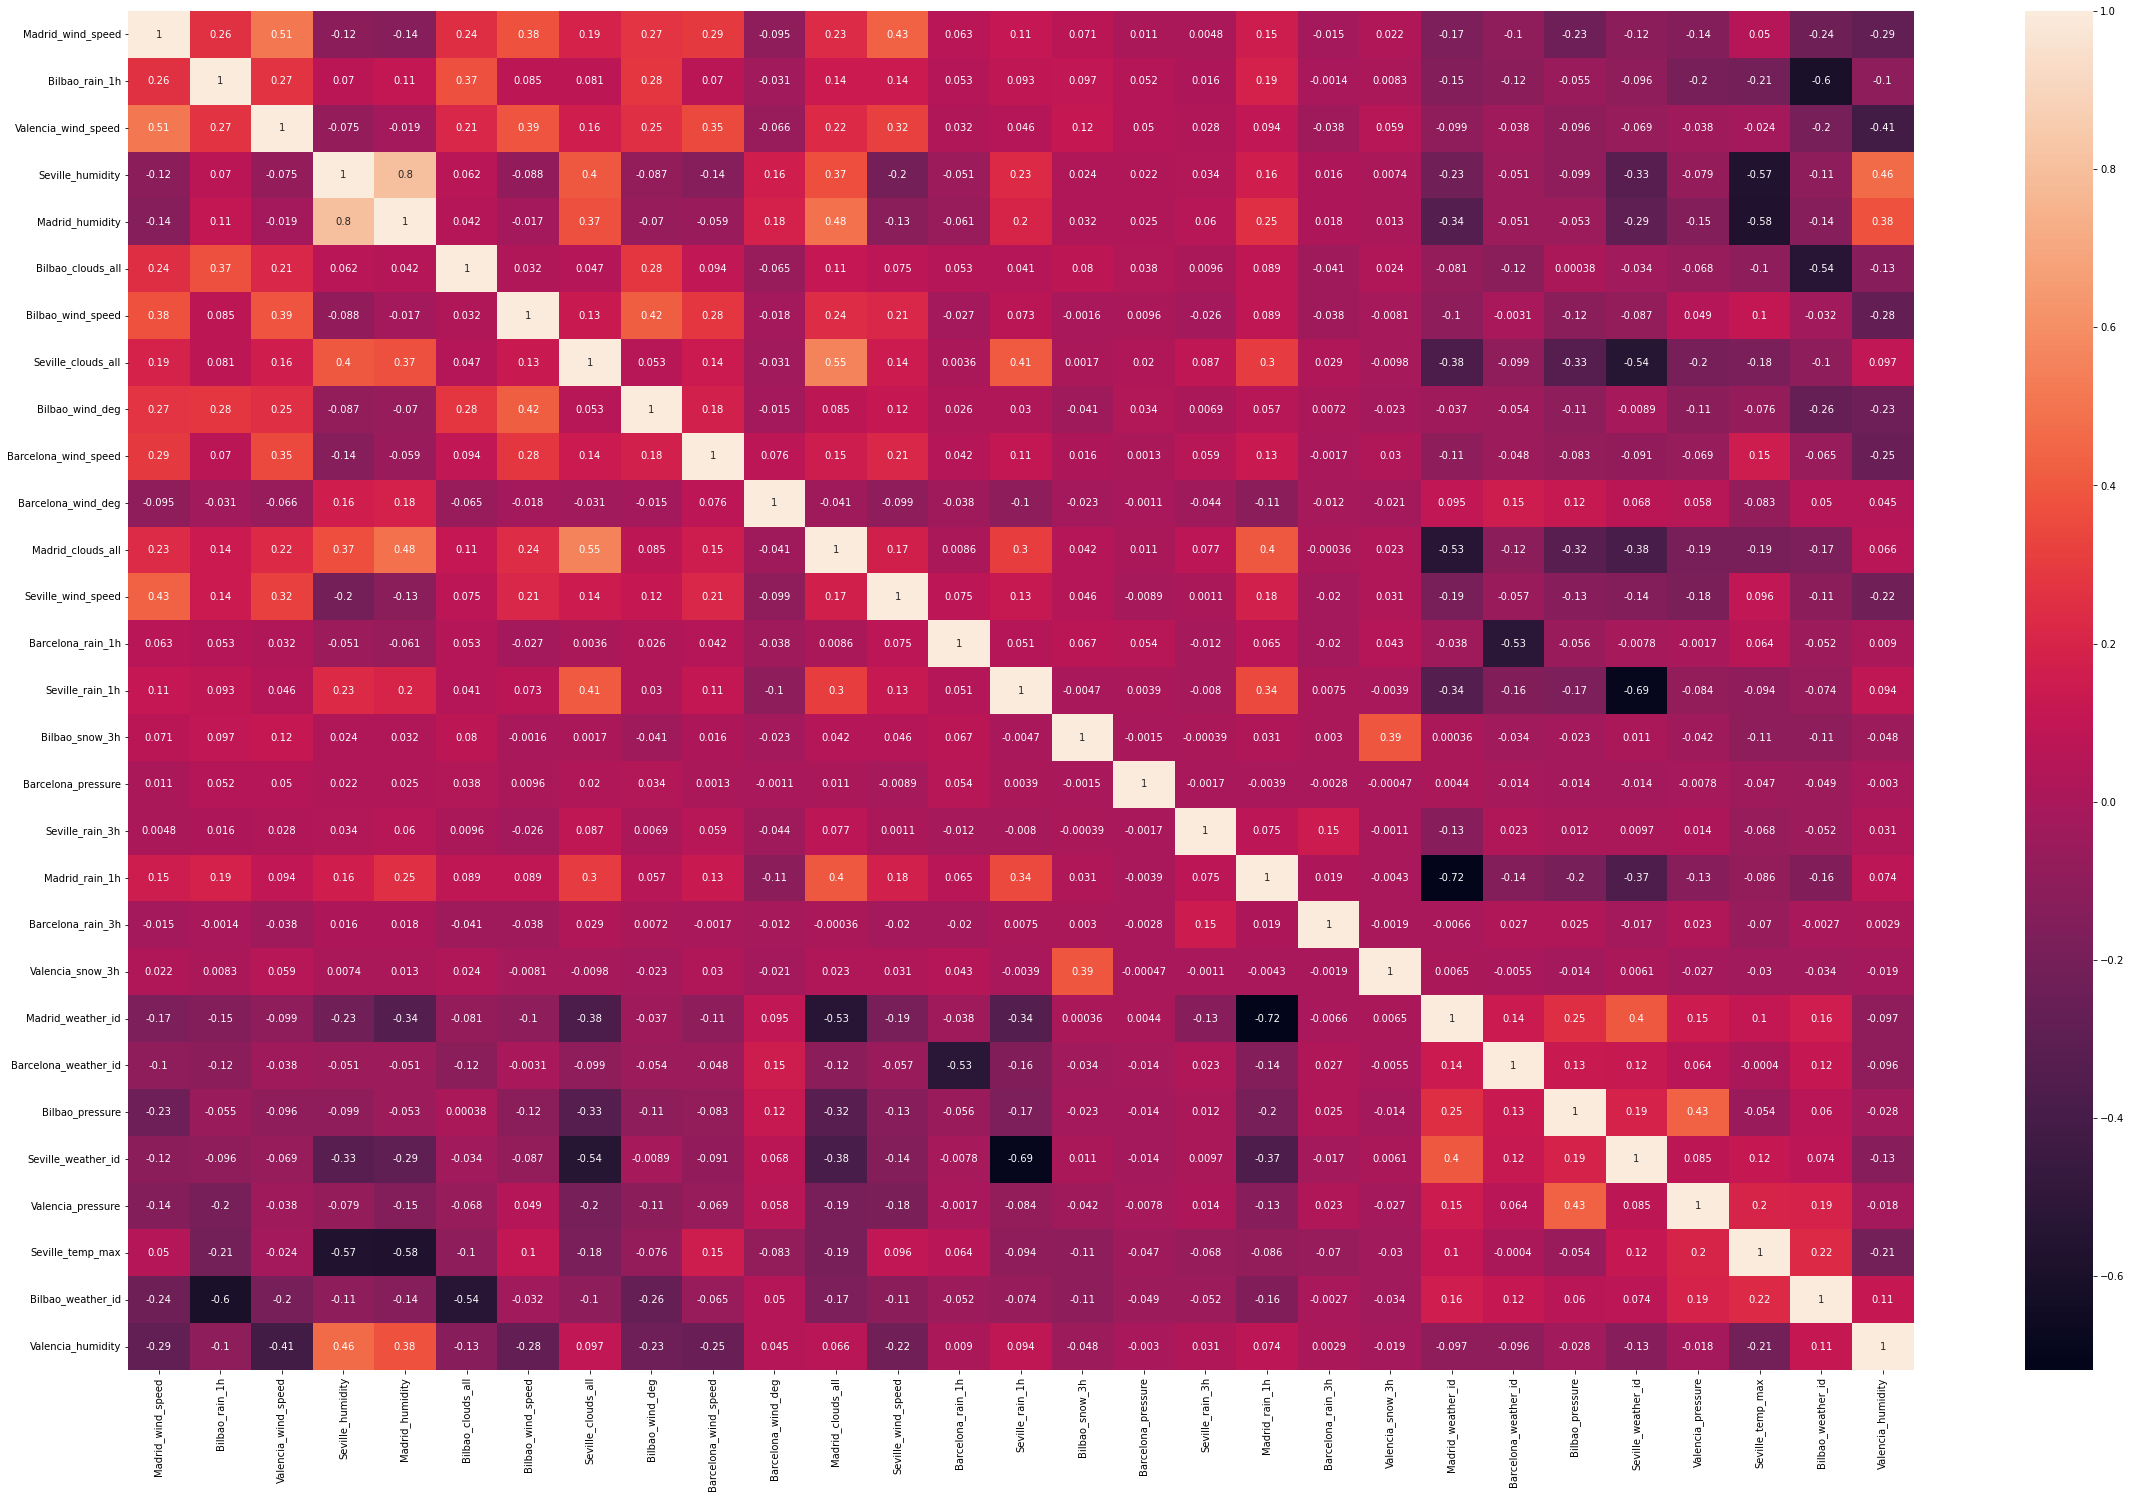

In [29]:

# Plot the matrix
plt.figure(figsize=(40,25))
sns.heatmap(X_features.corr(),annot=True)

In [35]:
# create scaler object
scaler = StandardScaler()


In [36]:
# create scaled version of the predictors (there is no need to scale the response)
X_scaled = scaler.fit_transform(X)
# convert the scaled predictor values into a dataframe
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)
X_standardise.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Bilbao_weather_id,Valencia_humidity
0,-0.950708,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,1.932284,...,-0.110037,-0.017312,0.342424,0.385993,1.718219,0.352274,-1.129531e+00,-2.616796,0.649842,0.540928
1,-1.130863,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,0.630270,...,-0.110037,-0.017312,0.342424,0.385993,1.784583,0.352274,-9.289340e-01,-2.539014,0.649842,0.298645
2,-0.770554,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,-0.485743,...,-0.110037,-0.017312,0.342424,0.385993,1.817765,0.352274,-8.085757e-01,-2.105564,0.649842,0.021750
3,-0.770554,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,-0.299741,...,-0.110037,-0.017312,0.342424,0.385993,1.817765,0.352274,-3.672620e-01,-1.361703,0.649842,-0.583957
4,-0.770554,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,0.816272,...,-0.110037,-0.017312,0.342424,0.385993,1.751401,0.352274,2.736630e-13,-1.348214,0.649842,-0.358980


In [37]:
X_standardise.describe().loc['std']

Madrid_wind_speed       1.000057
Bilbao_rain_1h          1.000057
Valencia_wind_speed     1.000057
Seville_humidity        1.000057
Madrid_humidity         1.000057
Bilbao_clouds_all       1.000057
Bilbao_wind_speed       1.000057
Seville_clouds_all      1.000057
Bilbao_wind_deg         1.000057
Barcelona_wind_speed    1.000057
Barcelona_wind_deg      1.000057
Madrid_clouds_all       1.000057
Seville_wind_speed      1.000057
Barcelona_rain_1h       1.000057
Seville_rain_1h         1.000057
Bilbao_snow_3h          1.000057
Barcelona_pressure      1.000057
Seville_rain_3h         1.000057
Madrid_rain_1h          1.000057
Barcelona_rain_3h       1.000057
Valencia_snow_3h        1.000057
Madrid_weather_id       1.000057
Barcelona_weather_id    1.000057
Bilbao_pressure         1.000057
Seville_weather_id      1.000057
Valencia_pressure       1.000057
Seville_temp_max        1.000057
Bilbao_weather_id       1.000057
Valencia_humidity       1.000057
Name: std, dtype: float64

In [38]:


#Training model
linear_regression = LinearRegression()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=1)
linear_regression.fit(X_train,y_train)

#predictING on unseen data
predict = linear_regression.predict(X_test)
train_predict = linear_regression.predict(X_train) 
#The parameters of the best fit line:
beta_0 = float(linear_regression.intercept_)
beta_js = pd.DataFrame(linear_regression.coef_, X.columns, columns=['Coefficient'])
print("Intercept:", beta_0)
beta_js



Intercept: -4981.943903687163


,Coefficient
Madrid_wind_speed,-298.342954
Bilbao_rain_1h,-683.315724
Valencia_wind_speed,-79.300273
Seville_humidity,-41.767029
Madrid_humidity,-17.180182
Bilbao_clouds_all,-4.433518
Bilbao_wind_speed,-32.655901
Seville_clouds_all,0.350179
Bilbao_wind_deg,-2.343871
Barcelona_wind_speed,-143.180448


In [39]:
lasso = Lasso(alpha=0.01)
# Train the LASSO model
lasso.fit(X_train, y_train)
# Get predictions
lasso_pred = lasso.predict(X_test)

In [40]:
# Creating Ridge model
Ridge = Ridge()
# Train the model
Ridge.fit(X_train, y_train)
# Get predictions
Ridge_pred = Ridge.predict(X_test)

In [44]:
#compering the original and the predicted ones
Linear_value= pd.DataFrame({'original': y_test, 'Predicted': predict})
Lasso_value = pd.DataFrame({'original': y_test, 'Predicted': lasso_pred})
Ridge_value = pd.DataFrame({'original': y_test, 'Predicted': Ridge_pred})

In [45]:
#print linear
print(Linear_value.head(3))

          original     Predicted
7441  18097.666667  11352.934310
6355  12578.000000   7504.086278
1271   8510.666667  11421.929566


In [46]:
print(Lasso_value.head(3))

          original     Predicted
7441  18097.666667  11352.862105
6355  12578.000000   7503.936868
1271   8510.666667  11422.426197


In [47]:
print(Ridge_value.head(3))

          original     Predicted
7441  18097.666667  11349.027698
6355  12578.000000   7497.022479
1271   8510.666667  11447.510606


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [50]:
# Compare model performance
results_dict = { 
    
                      'Training MSE':
                    
                        {"Linear model": np.sqrt(metrics.mean_squared_error(y_test,predict)),
                        "Ridge": np.sqrt(metrics.mean_squared_error(y_test,Ridge_pred)),
                        "Lasso" : np.sqrt(metrics.mean_squared_error(y_test,lasso_pred)),
                        }
}
results_df = pd.DataFrame(data=results_dict)
round(results_df,1)

,Training MSE
Lasso,4898.0
Linear model,4897.9
Ridge,4906.8


In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic